# Introduction
<img src="https://i.pinimg.com/originals/4c/0b/51/4c0b5190cf49d2d3e16d8ab56c632b44.jpg" width="600">

League of Legends (LoL) is a Multiplayer Online Battle Arena, MOBA game developed and serviced by Riot Games. There are a total of three lines (TOP, MID, BOT) with about 150 champions playing the game. Normally, killing an enemy champion and destroying the final Nexus will win the game.

This data is the data of the game records of the blue and red teams for each game. There are two sets of data, one starting and building up to 10 minutes, and the other building up to 15 minutes. In addition, the data is game data of challenger users(Very Very High Rank).

Looking at the data set in a large category, the primary key for each game is the first, the win for each team, the third, the object acquisition for each team, and the fourth, the actions of users for each team.

Object data includes information about dragons, Rift herald, turrets, inhibitor, and barons, and user behavior information includes ward installation, ward removal, kill, death, assist, level, gold, and minion kill.

[Data Source](https://www.kaggle.com/gyejr95/league-of-legends-challenger-rank-game10min15min?fbclid=IwAR2ya0Su7N-B9IqROu1nQxKY4kq748gVsrHTGziU2o0GluIR5duBJMkYRkM) created by [Kaggle @Minyoung Shin](https://www.kaggle.com/gyejr95)

In this kernel, we aim for an overall exploratory data analysis. Then, we build a binary base line model of which team won.

# Table of Content
- Import Module  
- Load Data
- Data Description

# 1. Import Module

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
import os
print(os.listdir('../dataset'))
warnings.filterwarnings('ignore')

['Challenger_Ranked_Games_10minute.csv', 'Challenger_Ranked_Games_15minute.csv']


# 2. Load Data
Data is available 10 minutes after the start of the game and 15 minutes after the game.

Since the final problem with this kernel is classification, we will first split the training data and test data and proceed.

In [2]:
data = pd.read_csv('../dataset/Challenger_Ranked_Games_10minute.csv')
print('10 Minute Dataset Shape: ', data.shape)

10 Minute Dataset Shape:  (26409, 51)


# 3. Exploratory Data Analysis
The purpose of the EDA is to understand the data and see how the distribution of winning and losing teams differs by variable.

First, check the type of the data and check the summary statistics of the variables.

## 3.1 Check Data Type

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26409 entries, 0 to 26408
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gameId                      26409 non-null  int64  
 1   blueWins                    26409 non-null  int64  
 2   blueTotalGolds              26409 non-null  int64  
 3   blueCurrentGolds            26409 non-null  int64  
 4   blueTotalLevel              26409 non-null  int64  
 5   blueAvgLevel                26409 non-null  float64
 6   blueTotalMinionKills        26409 non-null  int64  
 7   blueTotalJungleMinionKills  26409 non-null  int64  
 8   blueFirstBlood              26409 non-null  int64  
 9   blueKill                    26409 non-null  int64  
 10  blueDeath                   26409 non-null  int64  
 11  blueAssist                  26409 non-null  int64  
 12  blueWardPlaced              26409 non-null  int64  
 13  blueWardKills               264

The data have 47 numeric variables and 4 categorical variables. Also, all variables have not a NULL value.

View summary statistics for numeric variables.

## 3.2 Summary Statistics

In [4]:
half_columns_1 = data.columns[:26]
data[half_columns_1].describe()

,gameId,blueWins,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,...,blueFirstTower,blueFirstInhibitor,blueTowerKills,blueMidTowerKills,blueTopTowerKills,blueBotTowerKills,blueInhibitor,blueFirstDragon,blueDragon,blueRiftHeralds
count,2.640900e+04,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.0,26409.000000,...,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.00000,26409.000000,26409.000000,26409.000000
mean,4.171693e+09,0.501117,18189.550418,3134.712636,36.257602,7.251520,213.852247,46.313189,0.0,7.664357,...,0.071112,0.006172,0.122496,0.065205,0.031618,0.025673,0.00621,0.304517,0.307509,0.189935
std,7.498289e+07,0.500008,5500.176340,1354.808376,5.616238,1.123248,37.630372,16.706504,0.0,6.079882,...,0.257017,0.078322,0.471898,0.315923,0.191318,0.180102,0.07856,0.460211,0.465637,0.392257
min,3.482433e+09,0.000000,7792.000000,38.000000,8.000000,1.600000,1.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,4.142159e+09,0.000000,15564.000000,2191.000000,34.000000,6.800000,202.000000,41.000000,0.0,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,4.190538e+09,1.000000,16609.000000,2950.000000,35.000000,7.000000,221.000000,48.000000,0.0,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,4.219429e+09,1.000000,17998.000000,3847.000000,36.000000,7.200000,238.000000,56.000000,0.0,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,4.261026e+09,1.000000,53161.000000,16248.000000,62.000000,12.400000,296.000000,144.000000,0.0,61.000000,...,1.000000,1.000000,9.000000,5.000000,3.000000,3.000000,1.00000,1.000000,2.000000,1.000000


In [5]:
half_columns_2 = data.columns[26:]
data[half_columns_2].describe()

,redWins,redTotalGolds,redCurrentGolds,redTotalLevel,redAvgLevel,redTotalMinionKills,redTotalJungleMinionKills,redFirstBlood,redKill,redDeath,...,redFirstTower,redFirstInhibitor,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragon,redRiftHeralds
count,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.0,26409.000000,26409.000000,...,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000,26409.000000
mean,0.498883,18162.025294,3115.994888,36.281041,7.256208,214.084403,47.043205,0.0,7.651520,7.664357,...,0.092999,0.008141,0.158847,0.083494,0.038245,0.037109,0.008179,0.370366,0.372790,0.135446
std,0.500008,5513.151861,1352.297406,5.580625,1.116125,37.615638,16.802328,0.0,6.089395,6.079882,...,0.290436,0.089862,0.546485,0.372633,0.211865,0.212246,0.090069,0.482912,0.486912,0.342206
min,0.000000,7920.000000,215.000000,16.000000,3.200000,21.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,15533.000000,2177.000000,34.000000,6.800000,202.000000,42.000000,0.0,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,16598.000000,2918.000000,35.000000,7.000000,222.000000,49.000000,0.0,6.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,17979.000000,3825.000000,36.000000,7.200000,238.000000,56.000000,0.0,9.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,58285.000000,20642.000000,61.000000,12.200000,301.000000,121.000000,0.0,65.000000,61.000000,...,1.000000,1.000000,8.000000,5.000000,3.000000,4.000000,1.000000,1.000000,3.000000,1.000000


## 3.3 Label
There are blue team win variables and red team win variables within the data. 

We will only use the blue team victory variable(blueWins) here.

Since the final problem with this kernel is classification, we will first split the training data and test data and proceed.

In [6]:
data.drop(columns = 'redWins', inplace = True)
print("Data Shape Without redWins : ", data.shape)

Data Shape Without redWins :  (26409, 50)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = 'blueWins'), data['blueWins'], test_size = 0.25, random_state = 42)

train = pd.concat([X_train, y_train], axis = 1)
test = pd.concat([X_test, y_test], axis = 1)

print("Train Data Shape : ", train.shape)
print("Test Data Shape : ", test.shape)

Train Data Shape :  (19806, 50)
Test Data Shape :  (6603, 50)


Check the class ratio for the blueWins variable.

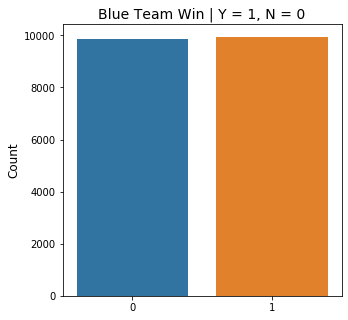

In [8]:
plt.figure(figsize=(5, 5))

sns.countplot(train['blueWins'])

plt.title("Blue Team Win | Y = 1, N = 0", fontsize=14)
plt.xlabel("")
plt.ylabel("Count", fontsize=12)

plt.show()

The blue team's winning percentage was found to be little different.

## 3.4 Categorical Variable

### 3.4.1 String Type

- blueFirstTowerLane: Blue team's first kill lane for 10 minutes.


- blueDragnoType: Type of Dragon killed by Blue Team for 10 minutes.


- redFirstTowerLane: Red team's first kill lane for 10 minutes.


- redDragnoType: Type of Dragon killed by Red Team for 10 minutes.

Let's check the frequency of categorical variables.

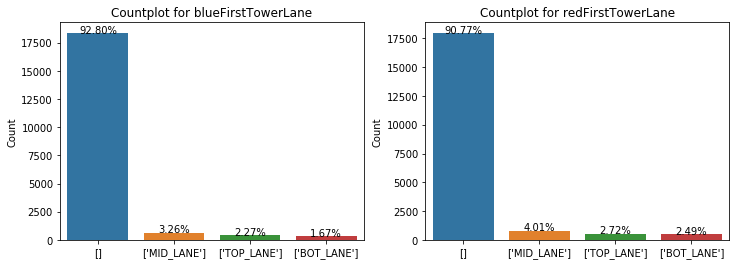

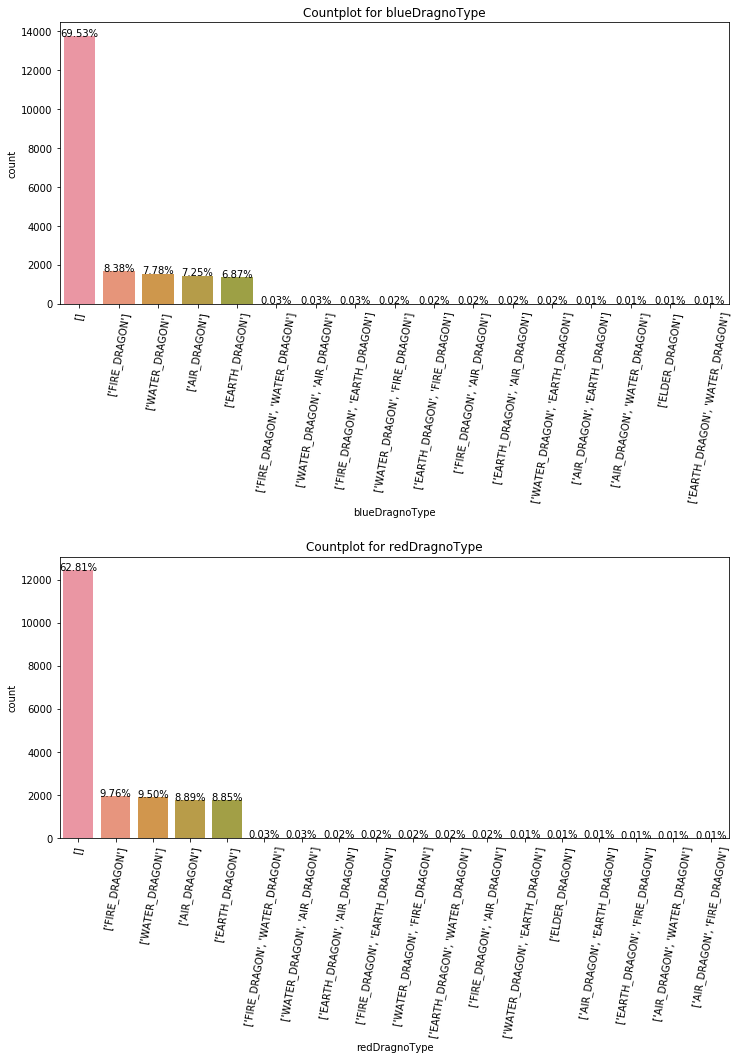

In [9]:
cat_cols = ['blueFirstTowerLane', 'redFirstTowerLane', 'blueDragnoType', 'redDragnoType']
length = len(train)

f = plt.figure(figsize = (12, 4))
for i,cat_col in enumerate(cat_cols[:2]):
    f.add_subplot(1, 2, i + 1)
    ax = sns.countplot(train[cat_col], order = train[cat_col].value_counts().index)

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
               height + 3,
               '{:1.2f}%'.format(height/length*100),
               ha = 'center')
    
    plt.xlabel("")
    plt.ylabel("Count")
    plt.title("Countplot for {}".format(cat_col))
    
f = plt.figure(figsize = (12, 15))
for i, cat_col in enumerate(cat_cols[2:]):
    f.add_subplot(2, 1, i + 1)
    ax = sns.countplot(train[cat_col], order = train[cat_col].value_counts().index)
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
               height + 3,
               '{:1.2f}%'.format(height/length*100),
               ha = 'center')
    
    plt.title("Countplot for {}".format(cat_col))
    plt.xticks(rotation = 80)
    plt.subplots_adjust(hspace = 0.9)

In most games, line kill didn't occur for 10 minutes. Also, the number of times a dragon was killed was less than one.

Here's to note: some of the games killed the elder dragon within 10 minutes of its beginning. The elder dragon appears after a team kills up to four dragons. This game is likely to have been misobserved because the first dragon is created five minutes after the game starts. Therefore, check the game that killed the elder dragon first.

In [10]:
train.loc[(train['blueDragnoType'] == "['ELDER_DRAGON']") | (train['redDragnoType'] == "['ELDER_DRAGON']")]

,gameId,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds,blueWins
26346,3959729584,37287,7519,40,8.0,150,5,0,18,21,...,3,1,0,2,0,1,['ELDER_DRAGON'],1,0,0
18830,3957862092,50508,6165,51,10.2,245,43,0,35,44,...,1,0,1,0,0,0,[],0,0,1
19996,3942684660,38444,2159,45,9.0,217,53,0,24,32,...,3,1,2,0,0,1,['ELDER_DRAGON'],1,0,0


Among the training data, it can be seen that only three matches were observed. Among the training data, it can be seen that only three matches were observed. Among them, the Blue and Red teams killed the elder dragon once and twice, respectively.

As I said before, the dragon first appears five minutes after the start of the game. So it's impossible to kill a dragon twice within 10 minutes of the game.

In [11]:
train.loc[(train['blueDragnoType'] != '[]') & (train['blueDragnoType'] != "['FIRE_DRAGON']") & (train['blueDragnoType'] != "['WATER_DRAGON']") &
         (train['blueDragnoType'] != "['AIR_DRAGON']") & (train['blueDragnoType'] != "['EARTH_DRAGON']")].head()

,gameId,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds,blueWins
9188,4121847711,43720,6035,46,9.2,255,22,0,30,11,...,0,0,0,0,0,0,[],0,0,1
23682,4088525106,43005,4959,48,9.6,172,43,0,42,40,...,1,1,0,0,0,0,[],0,0,0
21031,4123586420,41819,6999,44,8.8,204,24,0,33,23,...,1,0,1,0,0,0,[],0,0,1
24408,4105961472,46115,3916,47,9.4,249,43,0,32,28,...,0,0,0,0,0,0,[],0,0,1
23102,4126782387,46719,4441,48,9.6,191,144,0,40,29,...,2,1,1,0,0,0,[],0,0,1


A total of 39 game ids were observed where this impossible situation occurs. One thing to note is that in this case, the Red team didn't kill one dragon.

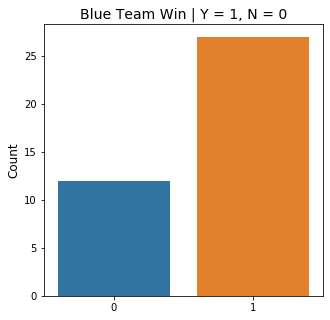

In [12]:
blue_over_two_dragon = train.loc[(train['blueDragnoType'] != '[]') & (train['blueDragnoType'] != "['FIRE_DRAGON']") & (train['blueDragnoType'] != "['WATER_DRAGON']") &
         (train['blueDragnoType'] != "['AIR_DRAGON']") & (train['blueDragnoType'] != "['EARTH_DRAGON']")]

plt.figure(figsize=(5, 5))

sns.countplot(blue_over_two_dragon['blueWins'])

plt.title("Blue Team Win | Y = 1, N = 0", fontsize=14)
plt.xlabel("")
plt.ylabel("Count", fontsize=12)

plt.show()

If you don't assume this is anomaly, you can see that the team that killed two or more dragons is more likely to win within 10 minutes of the game.

In [13]:
train.loc[(train['redDragnoType'] != '[]') & (train['redDragnoType'] != "['FIRE_DRAGON']") & (train['redDragnoType'] != "['WATER_DRAGON']") &
         (train['redDragnoType'] != "['AIR_DRAGON']") & (train['redDragnoType'] != "['EARTH_DRAGON']")].head()

,gameId,blueTotalGolds,blueCurrentGolds,blueTotalLevel,blueAvgLevel,blueTotalMinionKills,blueTotalJungleMinionKills,blueFirstBlood,blueKill,blueDeath,...,redTowerKills,redMidTowerKills,redTopTowerKills,redBotTowerKills,redInhibitor,redFirstDragon,redDragnoType,redDragon,redRiftHeralds,blueWins
11337,4156414549,40806,3381,47,9.4,200,29,0,30,41,...,3,2,0,1,0,1,"['FIRE_DRAGON', 'WATER_DRAGON']",2,0,0
7231,4135691926,36518,4898,44,8.8,227,24,0,16,26,...,0,0,0,0,0,1,"['EARTH_DRAGON', 'AIR_DRAGON']",2,0,0
11769,4128737503,47386,2568,48,9.6,249,17,0,38,26,...,1,0,1,0,0,1,"['WATER_DRAGON', 'FIRE_DRAGON']",2,0,1
5945,4131643571,35955,4230,43,8.6,187,6,0,23,42,...,4,1,1,2,0,1,"['EARTH_DRAGON', 'WATER_DRAGON']",2,0,0
24924,4137430963,35150,6215,41,8.2,184,4,0,17,32,...,5,1,1,3,1,1,"['FIRE_DRAGON', 'AIR_DRAGON']",2,0,0


Likewise, if the Red team had killed more than two dragons, the Blue team couldn't have killed one dragon.

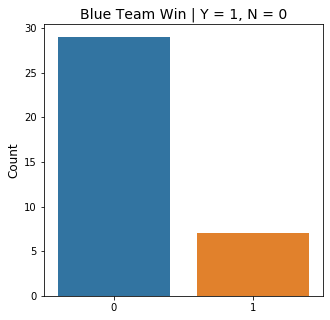

In [14]:
red_over_two_dragon = train.loc[(train['redDragnoType'] != '[]') & (train['redDragnoType'] != "['FIRE_DRAGON']") & (train['redDragnoType'] != "['WATER_DRAGON']") &
         (train['redDragnoType'] != "['AIR_DRAGON']") & (train['redDragnoType'] != "['EARTH_DRAGON']")]

plt.figure(figsize=(5, 5))

sns.countplot(red_over_two_dragon['blueWins'])

plt.title("Blue Team Win | Y = 1, N = 0", fontsize=14)
plt.xlabel("")
plt.ylabel("Count", fontsize=12)

plt.show()

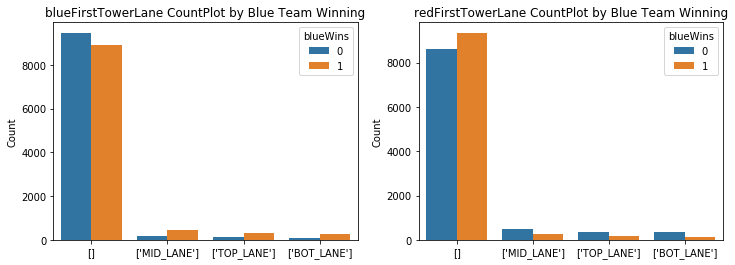

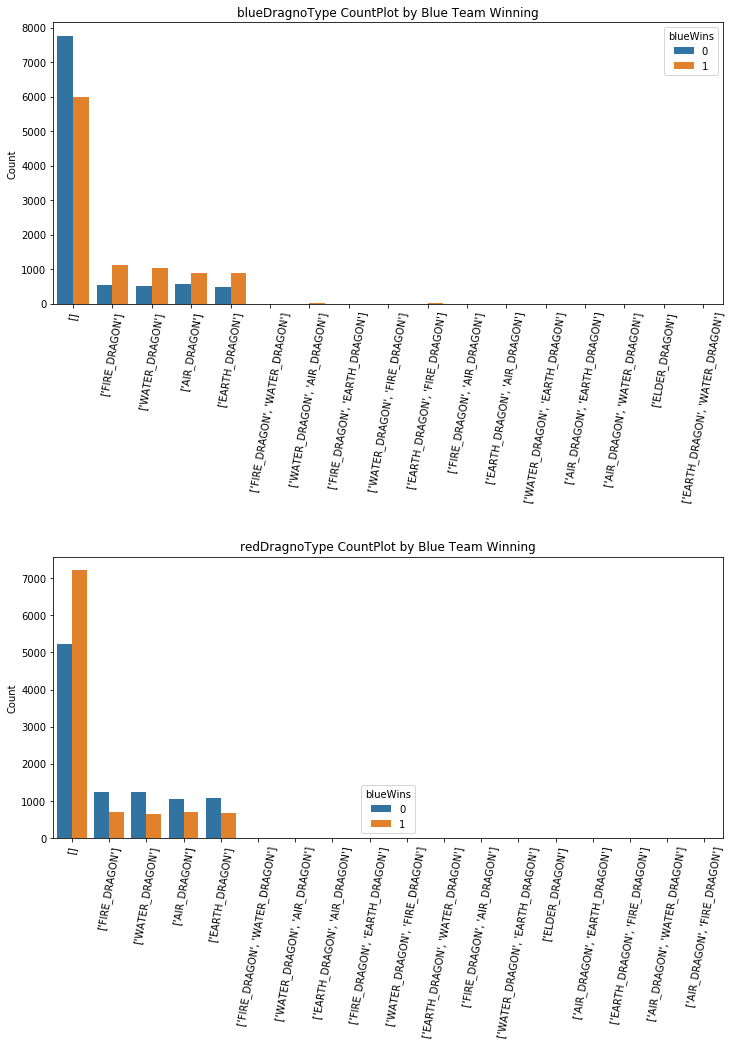

In [15]:
cat_cols = ['blueFirstTowerLane', 'redFirstTowerLane', 'blueDragnoType', 'redDragnoType']
length = len(train)

f = plt.figure(figsize = (12, 4))
for i,cat_col in enumerate(cat_cols[:2]):
    f.add_subplot(1, 2, i + 1)
    ax = sns.countplot(train[cat_col], hue = train['blueWins'],order = train[cat_col].value_counts().index)
    
    plt.xlabel("")
    plt.ylabel("Count")
    plt.title("{} CountPlot by Blue Team Winning".format(cat_col))
    
f = plt.figure(figsize = (12, 15))
for i, cat_col in enumerate(cat_cols[2:]):
    f.add_subplot(2, 1, i + 1)
    ax = sns.countplot(train[cat_col], hue = train['blueWins'], order = train[cat_col].value_counts().index)
    
    plt.title("{} CountPlot by Blue Team Winning".format(cat_col))
    plt.xlabel("")
    plt.ylabel("Count")
    plt.xticks(rotation = 80)
    plt.subplots_adjust(hspace = 0.9)

If the first kill occurs on the line within 10 minutes of the start of the game, there is a higher chance of winning. On the other hand, if a kill does not occur, the chances of winning are reduced.

If the Red team didn't kill on the line within 10 minutes of the start of the game, the Blue team has a higher percentage of wins.

<b>Through this phenomenon, it can be seen that a line kill occurs within 10 minutes of the game's start is a factor that affects the game.
Within 10 minutes of the start of the game, you can see that the result of which team kills the dragon also affects the game.</b>

### 3.4.2 Numerical Type

- blueFirstBlood: Blue Team wheather first blood


- blueFirstTower: Blue Team wheather first tower


- blueFirstInhibitor: Blue Team wheather first Inhibitor


- blueFirstDragon: Blue Team wheather first Dragon


- redFirstBlood: Red Team wheather first Blood


- redFirstTower: Red Team wheather first Tower


- redFirstInhibitor: Red Team wheather first Inhibitor


- redFirstDragon: Red Team wheather first Dragon


Other variables are found by performing exploratory data analysis.

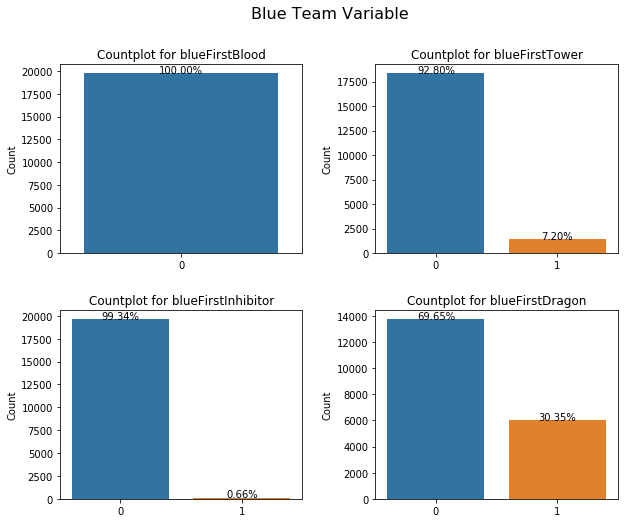

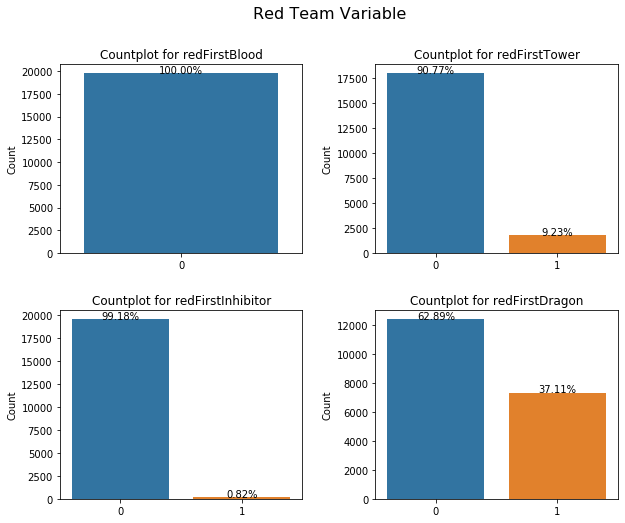

In [16]:
cat_cols_num = ['blueFirstBlood', 'blueFirstTower', 'blueFirstInhibitor', 'blueFirstDragon',
      'redFirstBlood', 'redFirstTower', 'redFirstInhibitor', 'redFirstDragon']

total = len(train)

f = plt.figure(figsize = (10, 8))
plt.suptitle("Blue Team Variable", fontsize = 16)

for i, cat_col_num in enumerate(cat_cols_num[:4]):
    f.add_subplot(2, 2, i + 1)
    
    ax = sns.countplot(train[cat_col_num])
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
               height + 3,
               '{:1.2f}%'.format(height/length*100),
               ha = 'center')
        
    plt.title("Countplot for {}".format(cat_col_num), fontsize = 12)
    plt.ylabel("Count", fontsize = 10)
    plt.xlabel("")
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
f = plt.figure(figsize = (10, 8))
plt.suptitle("Red Team Variable", fontsize = 16)

for i, cat_col_num in enumerate(cat_cols_num[4:]):
    f.add_subplot(2, 2, i + 1)
    
    ax = sns.countplot(train[cat_col_num])
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
               height + 3,
               '{:1.2f}%'.format(height/length*100),
               ha = 'center')
        
    plt.title("Countplot for {}".format(cat_col_num), fontsize = 12)
    plt.ylabel("Count", fontsize = 10)
    plt.xlabel("")
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)

Something strange has been discovered. It showed that the Blue team didn't play the first Blood in all the games. It also showed that the Red team didn't play the first Blood in all games. This is a completely different result from the previous FirstTowerLane variable. It is necessary to check this.

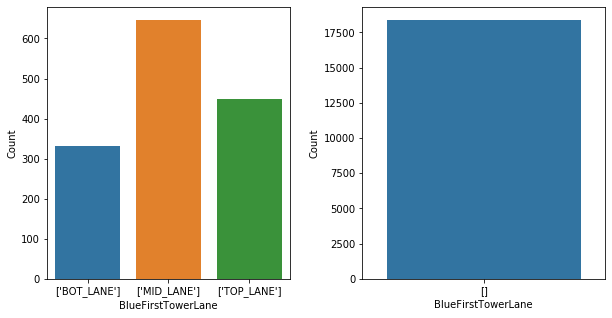

In [17]:
f = plt.figure(figsize = (10, 5))

f.add_subplot(1, 2, 1)
sns.countplot('blueFirstTowerLane', data = train.loc[(train['blueFirstTower'] == 1) & (train['blueFirstTowerLane'] != '[]')])

plt.xlabel("BlueFirstTowerLane")
plt.ylabel("Count")

f.add_subplot(1, 2, 2)
sns.countplot('blueFirstTowerLane', data = train.loc[(train['blueFirstTower'] == 0) & (train['blueFirstTowerLane'] == '[]')])

plt.xlabel("BlueFirstTowerLane")
plt.ylabel("Count")

plt.subplots_adjust(wspace = 0.3)

After checking the above data, we can see that the blueFirstTower variable is one if the blue team destroyed the tower before the red team within 10 minutes of the game, or zero if not. BlueFirstTowerLane indicates where the Blue Team destroyed the tower. Check out the column about the Red Team.

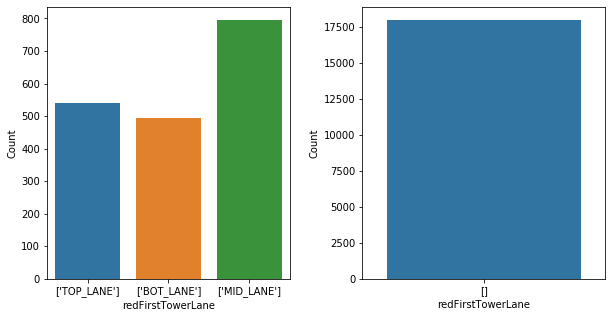

In [18]:
f = plt.figure(figsize = (10, 5))

f.add_subplot(1, 2, 1)
sns.countplot('redFirstTowerLane', data = train.loc[(train['redFirstTower'] == 1) & (train['redFirstTowerLane'] != '[]')])

plt.xlabel("redFirstTowerLane")
plt.ylabel("Count")

f.add_subplot(1, 2, 2)
sns.countplot('redFirstTowerLane', data = train.loc[(train['redFirstTower'] == 0) & (train['redFirstTowerLane'] == '[]')])

plt.xlabel("redFirstTowerLane")
plt.ylabel("Count")

plt.subplots_adjust(wspace = 0.3)

As such, it can be seen that the FirstBlood variable has nothing to do with the FirstTowerLane variable. The FirstBlood variable seems to need to be checked with the numerical variable.

We're going back to the team's Countplot.

Both the Blue team and the Red team had less than 10 percent of the towers within 10 minutes of the game.

Due to the location of the inhibitor, it is difficult to destroy within 10 minutes of the game. In fact, the rate at which inhibitors were destroyed was less than 1 percent. The team that destroyed the inhibitor within 10 minutes of the game is expected to have won with a very high probability.

The training data showed that the Blue team killed the first dragon within 10 minutes of the game. On the other hand, for the Red team, the training data was about 37 percent higher.

A question arose here. If the variable for the Blue team is 1, will the variable for the Red team be 0?

In [19]:
blue = cat_cols_num[:4]
red = cat_cols_num[4:]

for b, r in zip(blue, red):
    print("{} concurrent row (1,1) : ".format(b[4:]), train.loc[(train[b] == 1) & (train[r] == 1)].shape[0])

FirstBlood concurrent row (1,1) :  0
FirstTower concurrent row (1,1) :  0
FirstInhibitor concurrent row (1,1) :  0
FirstDragon concurrent row (1,1) :  0


Simultaneous variable values did not exist.

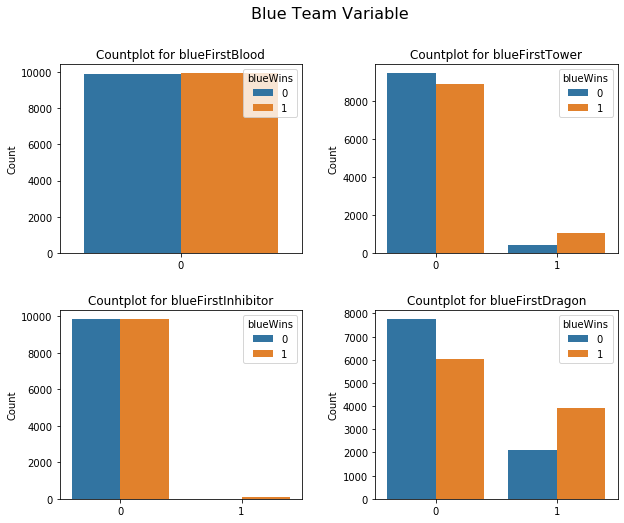

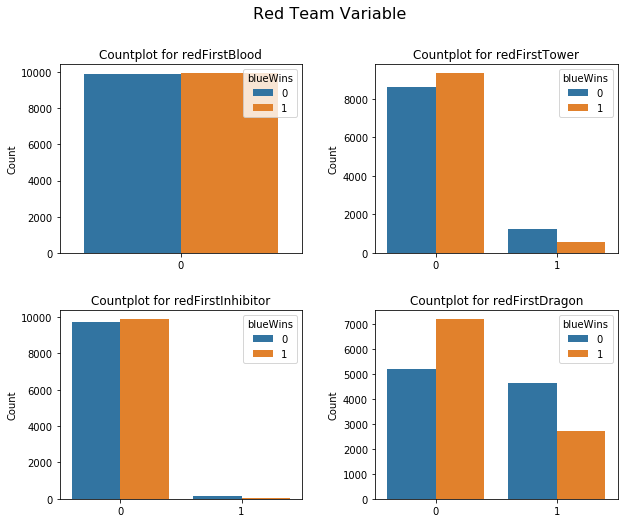

In [20]:
f = plt.figure(figsize = (10, 8))
plt.suptitle("Blue Team Variable", fontsize = 16)

for i, cat_col_num in enumerate(cat_cols_num[:4]):
    f.add_subplot(2, 2, i + 1)

    sns.countplot(train[cat_col_num], hue = 'blueWins', data = train)

    plt.title("Countplot for {}".format(cat_col_num), fontsize = 12)
    plt.ylabel("Count", fontsize = 10)
    plt.xlabel("")
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
f = plt.figure(figsize = (10, 8))
plt.suptitle("Red Team Variable", fontsize = 16)

for i, cat_col_num in enumerate(cat_cols_num[4:]):
    f.add_subplot(2, 2, i + 1)

    sns.countplot(train[cat_col_num], hue = 'blueWins', data = train)
     
    plt.title("Countplot for {}".format(cat_col_num), fontsize = 12)
    plt.ylabel("Count", fontsize = 10)
    plt.xlabel("")
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)

The results of visualizing the Countplots by the blue team's victory showed that:

- If the Blue team destroyed the Tower first, the winning percentage rose sharply. On the other hand, if the Red Team destroys it first, the winning percentage dropped sharply.


- This phenomenon was also seen in inhibitor and dragon variables.


<b>In conclusion, it can be seen that within 10 minutes of the start of the game, depending on which team destroies the towers, inhibitors, and dragons, it affects the game a lot.</b>

## 3.5 Numerical Variable

The data have 37 numeric variables.

Here, the gameId variable is a numeric variable but is not used for analysis because it is a unique id for the game itself.

In [21]:
cat_cols.extend(cat_cols_num) # total categorical variable 

### 3.5.1 Blue Team Variable

The total number of variables for the Blue team was 18. Let's check the distribution first.

In [22]:
num_cols = train.drop(columns = cat_cols).columns

blue_num_cols = num_cols[1:19]
red_num_cols = num_cols[19:-1]

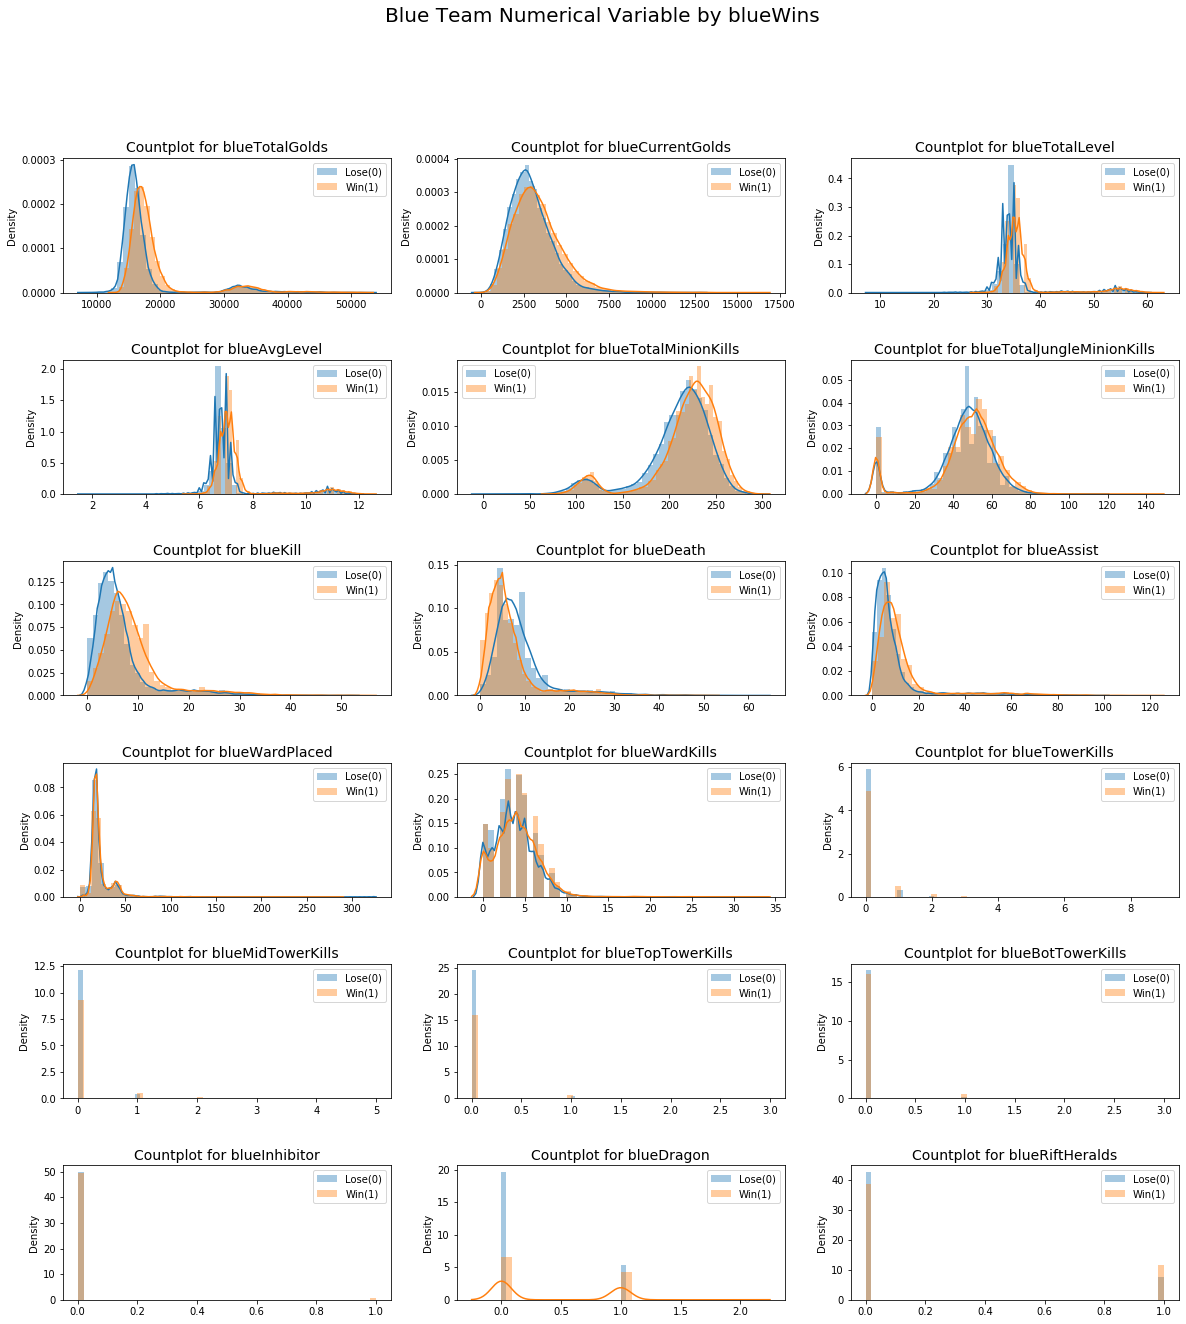

In [23]:
f = plt.figure(figsize = (20, 21))
plt.suptitle("Blue Team Numerical Variable by blueWins", fontsize = 20)

for i, num_col in enumerate(blue_num_cols):
        
        f.add_subplot(6, 3, i + 1)
        sns.distplot(train.loc[train['blueWins'] == 0][num_col], label = 'Lose(0)')
        sns.distplot(train.loc[train['blueWins'] == 1][num_col], label = 'Win(1)')
        
        plt.legend(loc = 'best')
        plt.title("Countplot for {}".format(num_col), fontsize = 14)
        plt.xlabel("")
        plt.ylabel("Density")
        plt.subplots_adjust(hspace = 0.5)

The distribution shows that blueTotalGolds, blueCurrentGolds, have some influence on victory. 

There are ways to earn gold in the League of Legends either by killing Minions or by killing opponents.

Kill, Death and Assist variables are also seen as factors affecting the victory.  
These variables can be reinterpreted as in-game influences called kda within the League of Legends.

After the blueWardKills variable, you can see that discrete values are shown. Therefore, these variables perform separate analyses.

- WardKills: Num of warding killed


- TowerKills: Tower Kill counts


- MidTowerKills: Mid Tower destroy counts


- TopTowerKills: Top Tower destroy counts


- BotTowerKills: Bot Tower destroy counts


- Dragon: Dragon Kill counts


- RiftHeralds: RiftHeralds Kill counts



We can see that $TowerKills = MidTowerKills + BotTowerKills + TopTowerKills$.

### 3.5.2 Red Team Variable

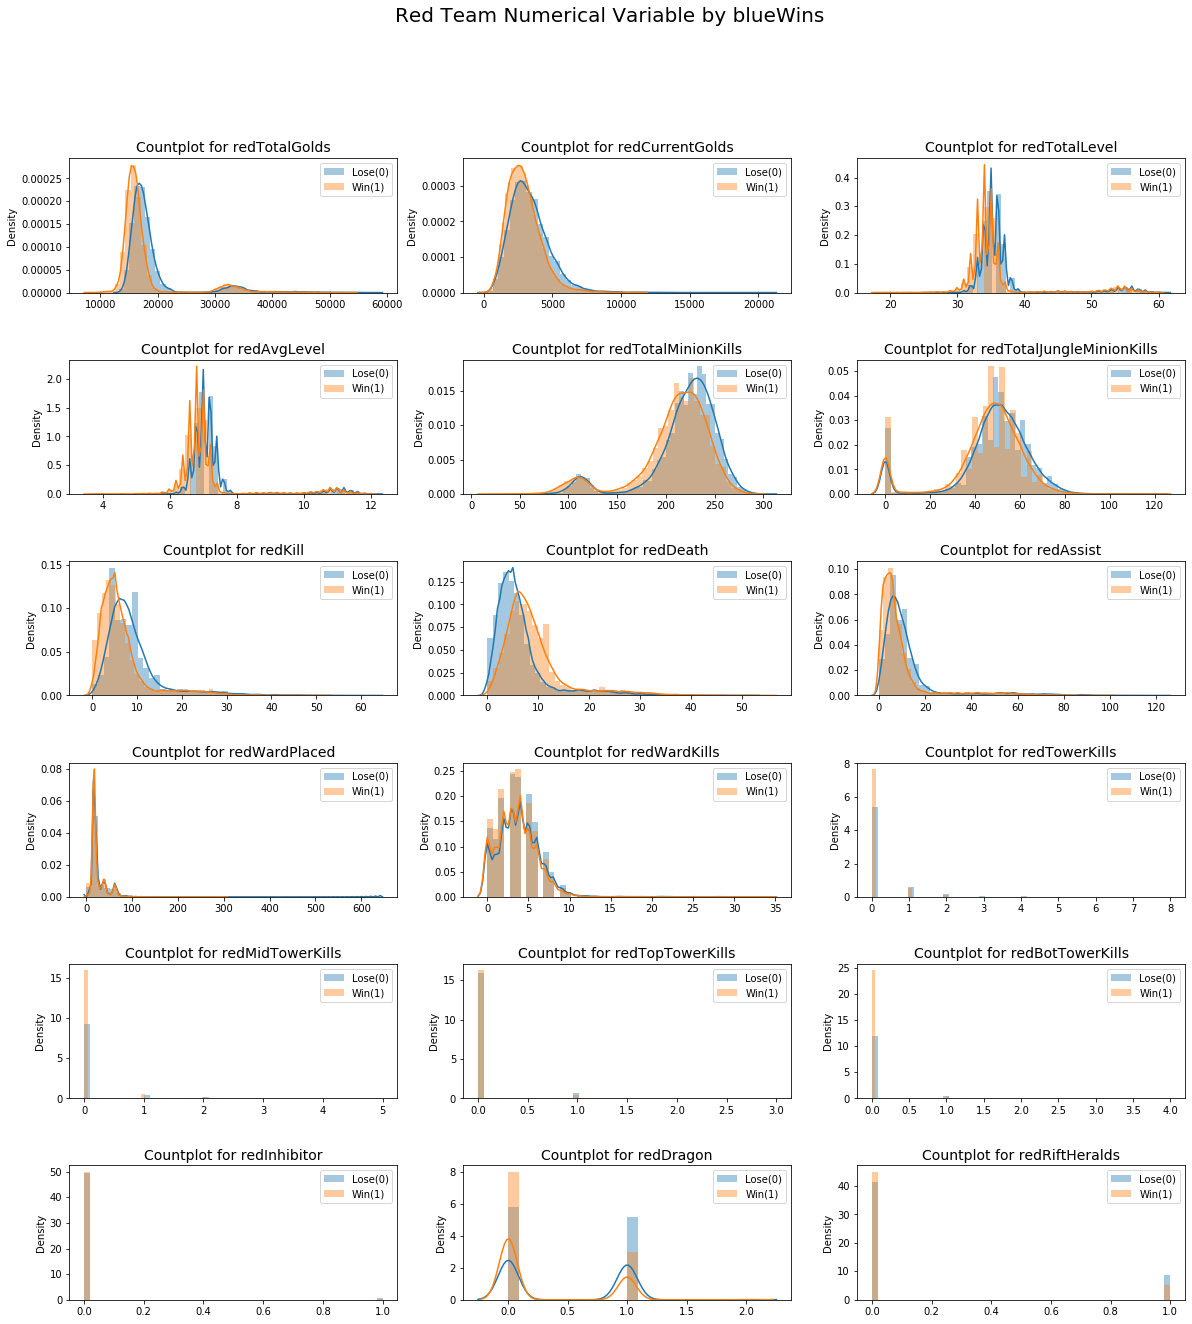

In [24]:
f = plt.figure(figsize = (20, 21))
plt.suptitle("Red Team Numerical Variable by blueWins", fontsize = 20)

for i, num_col in enumerate(red_num_cols):
        
        f.add_subplot(6, 3, i + 1)
        sns.distplot(train.loc[train['blueWins'] == 0][num_col], label = 'Lose(0)')
        sns.distplot(train.loc[train['blueWins'] == 1][num_col], label = 'Win(1)')
        
        plt.legend(loc = 'best')
        plt.title("Countplot for {}".format(num_col), fontsize = 14)
        plt.xlabel("")
        plt.ylabel("Density")
        plt.subplots_adjust(hspace = 0.5)

### 3.5.3 kd/a
The kd/a score shows the kill involvement of one life in the game.

kd/a can be expressed in the following formula:  


$ \large kd/a \ score = \frac {Player's \ Kill + Player's \ Assist}{Player's \ Death}\ $

If the number of deaths across the team is 0, the kd/a score is infinite. At this point, the kd/a score is called 'Perfect'.
It cannot be digitized. Therefore, let's calculate a value of 1, as a denominator.

Data cannot indicate kd/a for individual players. Therefore, we create a kd/a variable for the entire team, and then check the distribution.

In [25]:
train['blueKd/a'] = (train['blueKill'] + train['blueAssist']) / train['blueDeath']
train['redKd/a'] = (train['redKill'] + train['redAssist']) / train['redDeath']

print("Num of Blue Team Kd/a Score, NA :", train.loc[train['blueKd/a'].isna()].shape[0])
print("Num of red Team Kd/a Score, NA : ", train.loc[train['redKd/a'].isna()].shape[0])

Num of Blue Team Kd/a Score, NA : 8
Num of red Team Kd/a Score, NA :  8


In [26]:
train.loc[train['blueKd/a'].isna()][['blueKill', 'blueAssist', 'blueDeath', 'redKill', 'redAssist', 'redDeath', 'blueKd/a']]

,blueKill,blueAssist,blueDeath,redKill,redAssist,redDeath,blueKd/a
26012,0,0,0,0,0,0,NaN
1592,0,0,0,0,0,0,NaN
337,0,0,0,0,0,0,NaN
6437,0,0,0,0,0,0,NaN
18365,0,0,0,0,0,0,NaN
23924,0,0,0,0,0,0,NaN
4575,0,0,0,0,0,0,NaN
19626,0,0,0,0,0,0,NaN


In [27]:
print("Num of [Blue Team] Death 0 & Kill, Assist not 0: ", train.loc[~np.isfinite(train['blueKd/a'])].shape[0])
train.loc[~np.isfinite(train['blueKd/a'])][['blueKill', 'blueAssist', 'blueDeath', 'redKill', 'redAssist', 'redDeath', 'blueKd/a']].head()

Num of [Blue Team] Death 0 & Kill, Assist not 0:  170


,blueKill,blueAssist,blueDeath,redKill,redAssist,redDeath,blueKd/a
10328,44,24,0,0,0,44,inf
7930,4,3,0,0,0,4,inf
11206,4,4,0,0,0,4,inf
9350,2,2,0,0,0,2,inf
17628,8,10,0,0,0,8,inf


In [28]:
print("Num of [Red Team] Death 0 & Kill, Assist not 0: ", train.loc[~np.isfinite(train['blueKd/a'])].shape[0])
train.loc[~np.isfinite(train['redKd/a'])][['blueKill', 'blueAssist', 'blueDeath', 'redKill', 'redAssist', 'redDeath', 'redKd/a']].head()

Num of [Red Team] Death 0 & Kill, Assist not 0:  170


,blueKill,blueAssist,blueDeath,redKill,redAssist,redDeath,redKd/a
673,0,0,7,7,7,0,inf
19650,0,0,15,15,22,0,inf
11291,0,0,2,2,6,0,inf
10429,0,0,12,12,12,0,inf
12659,0,0,7,7,8,0,inf


In [29]:
train.loc[~np.isfinite(train['blueKd/a']), 'blueKd/a'] = (train['blueKill'] + train['blueAssist']) / 1
train.loc[~np.isfinite(train['redKd/a']), 'redKd/a'] = (train['redKill'] + train['redAssist']) / 1

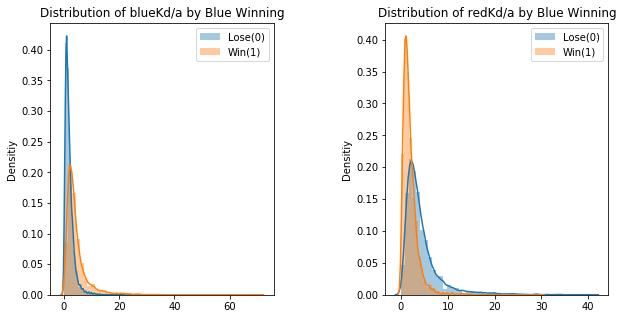

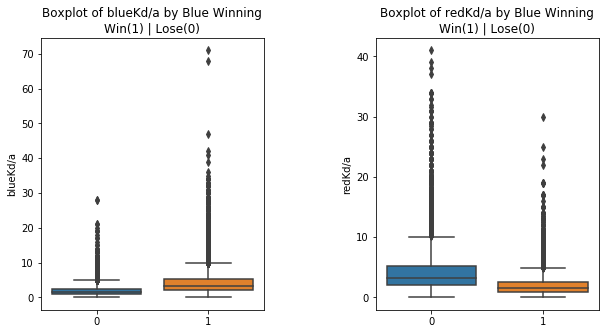

In [30]:
kda_list = ['blueKd/a', 'redKd/a']

f = plt.figure(figsize = (10, 5))

for i, kda in enumerate(kda_list):
    f.add_subplot(1, 2, i + 1)

    sns.distplot(train.loc[train['blueWins'] == 0][kda], label = 'Lose(0)')
    sns.distplot(train.loc[train['blueWins'] == 1][kda], label = 'Win(1)')
    
    plt.title("Distribution of {} by Blue Winning".format(kda))
    plt.legend(loc = 'best')
    plt.xlabel("")
    plt.ylabel("Densitiy")
    plt.subplots_adjust(wspace = 0.5)

f = plt.figure(figsize = (10, 5))

for i, kda in enumerate(kda_list):
    f.add_subplot(1, 2, i + 1)

    sns.boxplot(y = train[kda],x = 'blueWins', data = train)

    plt.title("Boxplot of {} by Blue Winning\nWin(1) | Lose(0)".format(kda))
    plt.xlabel("")
    plt.ylabel("{}".format(kda))
    plt.subplots_adjust(wspace = 0.5)

Although there is no noticeable difference, a low kd/a score indicates a slight drop in the winning percentage. Therefore, the kd/a score is thought to be a variable that affects victory.

### 3.5.4 Correlation

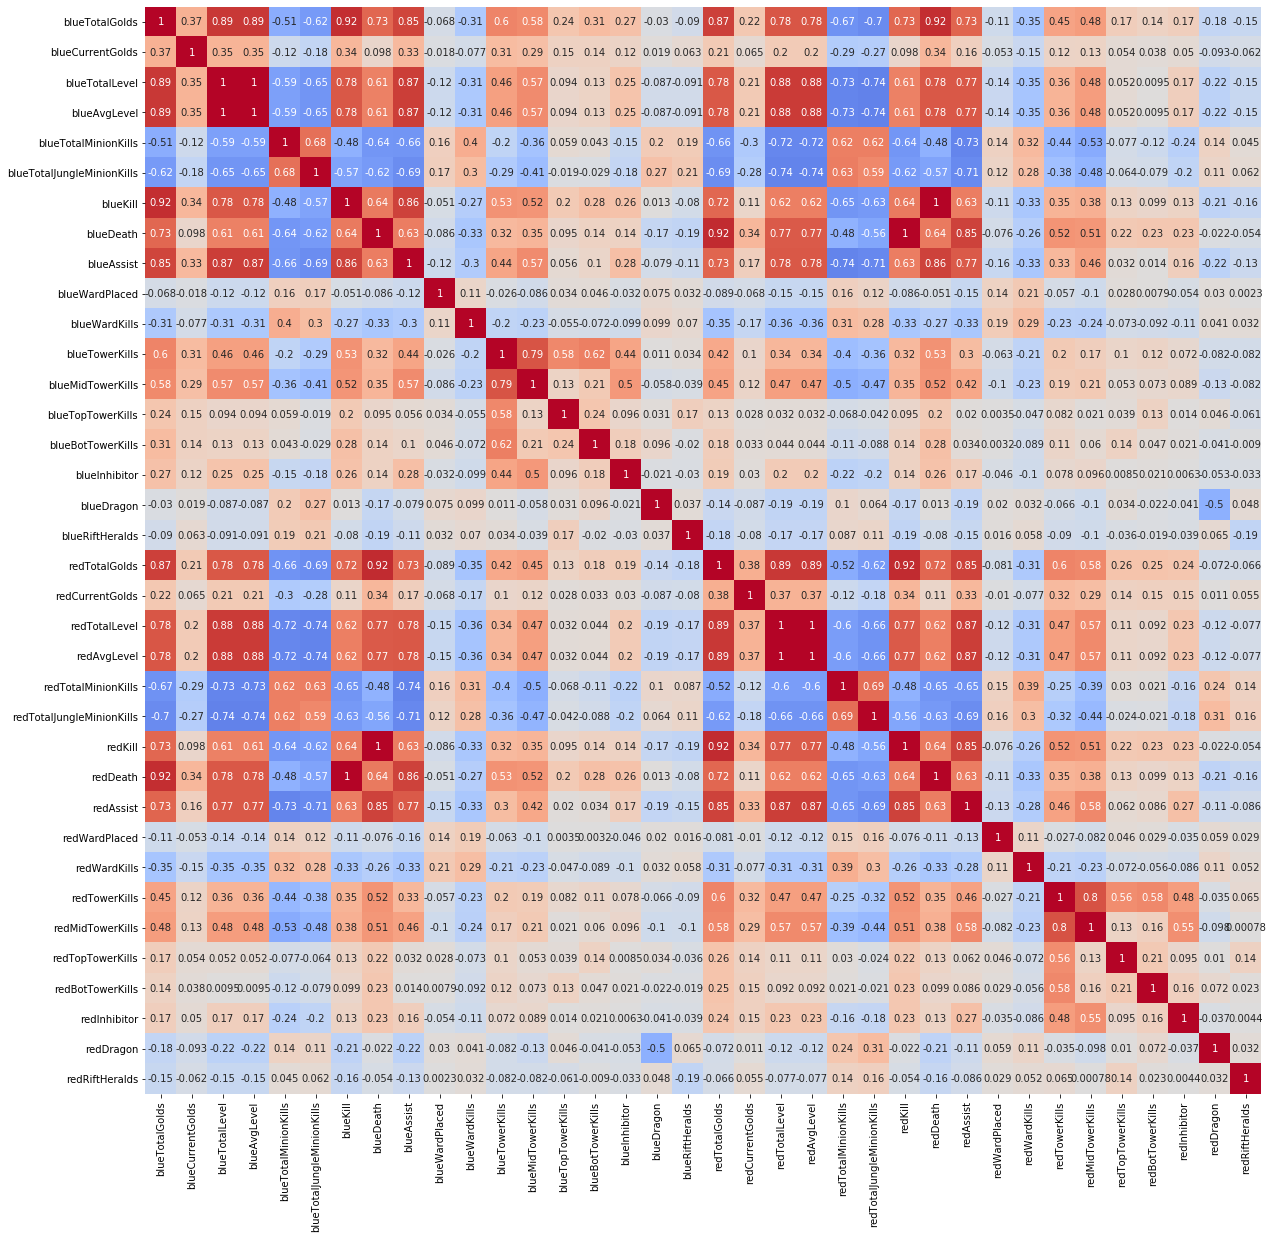

In [78]:
correlation = train[num_cols[1:-1]].corr()

plt.figure(figsize = (20, 20))
sns.heatmap(correlation, vmin = -1, vmax = 1, annot = True, cbar = False, cmap = 'coolwarm')

plt.show()